# Telecom X – Análisis Exploratorio de Evasión de Clientes

## 1. Diccionario de Datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

## 2. Extracción de Datos (API)

Aunque el archivo está en GitHub, técnicamente lo consumimos como una API HTTP que devuelve JSON, lo cual es exactamente lo que te piden practicar.

**Objetivo:**
- Descargar los datos
- Inspeccionar su estructura
- Convertirlos a un DataFrame de pandas

In [83]:
#URL de la API (JSON)
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

In [84]:
import pandas as pd
import requests

#Hacemos el request de la API y verificamos que la respuesta sea correcta si el status code es 200
datos_fuente = requests.get(url)
datos_fuente.status_code

200

In [85]:
#Convesrtimos la respuesta a JSON e inspeccionamos con qué tipo de dato estamos tratando
datos_json = datos_fuente.json()
type(datos_json)

list

In [86]:
#Ya que el dataset es una lista de diccionarios (porque cada cliente es un registro), lo normalizamos
df_normalizado = pd.json_normalize(datos_json)
df_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 3. Exploración Inicial del Dataset

In [87]:
df_normalizado.shape

(7267, 21)

In [88]:
df_normalizado.columns.tolist()

['customerID',
 'Churn',
 'customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'account.Charges.Monthly',
 'account.Charges.Total']

In [89]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [90]:
#Verifricamos que no haya datos nulos
df_normalizado.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


Aquí empiezamos a entender qué información tenemos, algo clave antes de limpiar.

In [91]:
df_normalizado.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [92]:
df_normalizado.describe(include="object")

,customerID,Churn,customer.gender,customer.Partner,customer.Dependents,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Total
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2
freq,1,5174,3675,3749,5086,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445,11


Qué estámos aprendiendo aquí?
- Consumo de datos desde API
- Lectura de estructuras JSON reales
- Primer contacto con datos “sucios”
- Pensamiento analítico antes de transformar

## 4. Limpieza y Transformación de Datos (ETL)

In [93]:
#Iniciamos la estandarización de los datos con mejores nombres de columnas
df_normalizado.rename(columns={'customerID':'id',	'Churn':'churn', 'customer.gender':'gender', 'customer.SeniorCitizen':'senior_citizen',
                               'customer.Partner':'partner', 'customer.Dependents':'dependents',
                               'customer.tenure':'tenure', 'phone.PhoneService':'phone_service',
                               'phone.MultipleLines':'multiple_lines', 'internet.InternetService':'internet_service',
                               'internet.OnlineSecurity':'online_security', 'internet.OnlineBackup':'online_backup',
                               'internet.DeviceProtection':'device_protection', 'internet.TechSupport':'tech_support',
                               'internet.StreamingTV':'streaming_tv', 'internet.StreamingMovies':'streaming_movies',
                               'account.Contract':'contract', 'account.PaperlessBilling':'paperless_billing',
                               'account.PaymentMethod':'payment_method', 'account.Charges.Monthly':'monthly_charges',
                               'account.Charges.Total':'total_charges',
                               }, inplace=True)

In [94]:
df_normalizado.head(1)

,id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3


In [95]:
#Convertimos variables con valores str 'Yes'/'No' a binarias '1'/'0'
columnas_a_mapear = ['churn','partner','dependents','phone_service','multiple_lines',
               'online_security','online_backup','device_protection','tech_support',
               'streaming_tv','streaming_movies','paperless_billing']

for col in columnas_a_mapear:
    df_normalizado[col] = df_normalizado[col].map({'Yes': 1, 'No': 0})


In [96]:
df_normalizado['daily_charges'] = (df_normalizado['monthly_charges'] / 30).round(2)
df_normalizado.head()

,id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,daily_charges
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.4,2.80


In [97]:
df_normalizado.head(1)

,id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,daily_charges
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.3,2.19


In [98]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7267 non-null   object 
 1   churn              7043 non-null   float64
 2   gender             7267 non-null   object 
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   int64  
 5   dependents         7267 non-null   int64  
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   int64  
 8   multiple_lines     6560 non-null   float64
 9   internet_service   7267 non-null   object 
 10  online_security    5686 non-null   float64
 11  online_backup      5686 non-null   float64
 12  device_protection  5686 non-null   float64
 13  tech_support       5686 non-null   float64
 14  streaming_tv       5686 non-null   float64
 15  streaming_movies   5686 non-null   float64
 16  contract           7267 

In [99]:
#Revisamos tipos de datos problemáticos y convertimos los valores que no estén en formato correcto del dataset
df_normalizado['total_charges'] = pd.to_numeric(df_normalizado['total_charges'], errors='coerce')

In [100]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7267 non-null   object 
 1   churn              7043 non-null   float64
 2   gender             7267 non-null   object 
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   int64  
 5   dependents         7267 non-null   int64  
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   int64  
 8   multiple_lines     6560 non-null   float64
 9   internet_service   7267 non-null   object 
 10  online_security    5686 non-null   float64
 11  online_backup      5686 non-null   float64
 12  device_protection  5686 non-null   float64
 13  tech_support       5686 non-null   float64
 14  streaming_tv       5686 non-null   float64
 15  streaming_movies   5686 non-null   float64
 16  contract           7267 

In [101]:
df_normalizado.isnull().sum().sort_values(ascending=False)

,0
streaming_tv,1581
streaming_movies,1581
online_security,1581
online_backup,1581
device_protection,1581
tech_support,1581
multiple_lines,707
churn,224
total_charges,11
dependents,0


In [102]:
#Sacamos la distribución de Churn para ver qué porcentaje de los clientes han dejado la empresa
churn_distribution = df_normalizado['churn'].value_counts(normalize=True) * 100

import plotly.express as px

# Convertir la serie a DataFrame para Plotly Express
churn_df = churn_distribution.reset_index()
churn_df.columns = ['Churn', 'Percentage']

# Mapear los valores numéricos de churn a etiquetas descriptivas para una mejor visualización
churn_df['Churn'] = churn_df['Churn'].map({0.0: 'No Churn', 1.0: 'Churn'})

# Crear el gráfico interactivo con Plotly Express
fig = px.bar(
    churn_df,
    x='Churn',
    y='Percentage',
    title='Distribución del Churn (Porcentaje)',
    labels={'Churn': 'Estado de Churn', 'Percentage': 'Porcentaje de Clientes'},
    color='Churn',
    color_discrete_map={'No Churn': 'blue', 'Churn': 'red'}
)

fig.update_layout(xaxis_title='Estado de Churn', yaxis_title='Porcentaje de Clientes (%)')
fig.show()


In [103]:
#Simplificamos el nombre del df para el análisis más a fondo
df = df_normalizado.copy()

## 5. Análisis Exploratorio de Datos (EDA)

In [104]:
df.describe()

,churn,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,daily_charges
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,6560.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.467226,0.365459,0.440380,0.438094,0.370032,0.490679,0.495251,0.593230,64.720098,2280.634213,2.157292
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.498963,0.481601,0.496476,0.496196,0.482855,0.499957,0.500021,0.491265,30.129572,2268.632997,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,400.225000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3785.300000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


**Objetivo del EDA**

Responder:

- ¿Qué características diferencian a los clientes que churnean de los que no?

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
#Comenzamos con el análisis de variables más influyentes para el negocio
pd.crosstab(df['contract'], df['churn'], normalize='index')

churn,0.0,1.0
contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


In [107]:
pd.crosstab(df['internet_service'], df['churn'], normalize='index')

churn,0.0,1.0
internet_service,,
DSL,0.810409,0.189591
Fiber optic,0.581072,0.418928
No,0.925950,0.074050


In [108]:
pd.crosstab(df['payment_method'], df['churn'], normalize='index')

churn,0.0,1.0
payment_method,,
Bank transfer (automatic),0.832902,0.167098
Credit card (automatic),0.847569,0.152431
Electronic check,0.547146,0.452854
Mailed check,0.808933,0.191067


In [109]:
pd.crosstab(df['paperless_billing'], df['churn'], normalize='index')

churn,0.0,1.0
paperless_billing,,
0,0.836699,0.163301
1,0.664349,0.335651


In [110]:
pd.crosstab(df['tech_support'], df['churn'], normalize='index')

churn,0.0,1.0
tech_support,,
0.0,0.583645,0.416355
1.0,0.848337,0.151663


/tmp/ipython-input-720276521.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




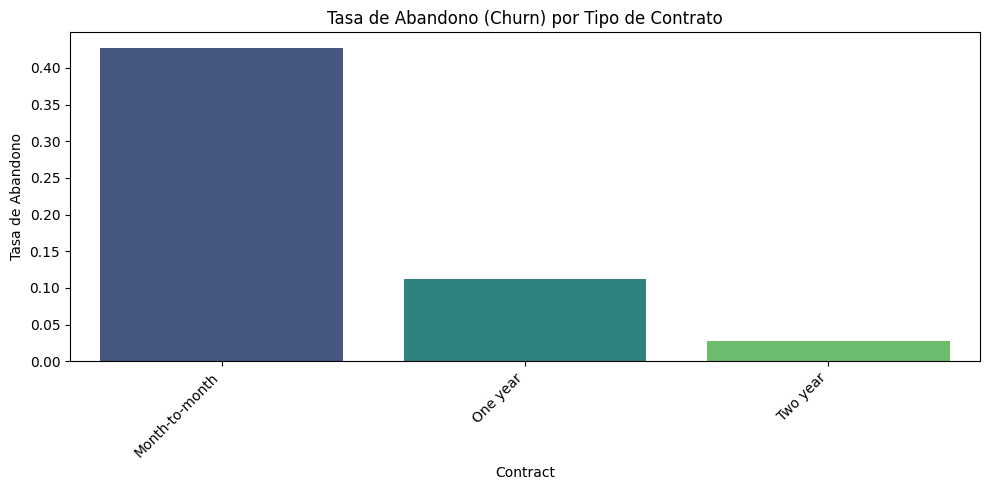

/tmp/ipython-input-720276521.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




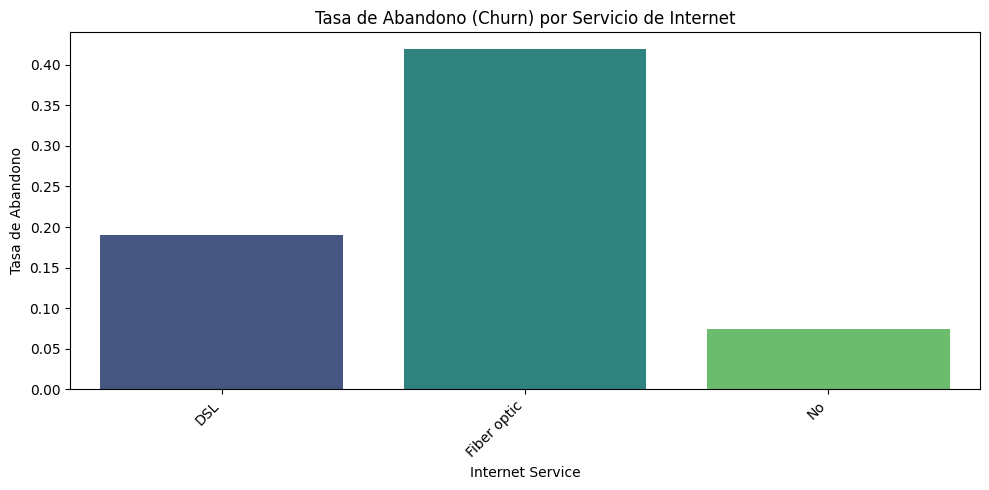

/tmp/ipython-input-720276521.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




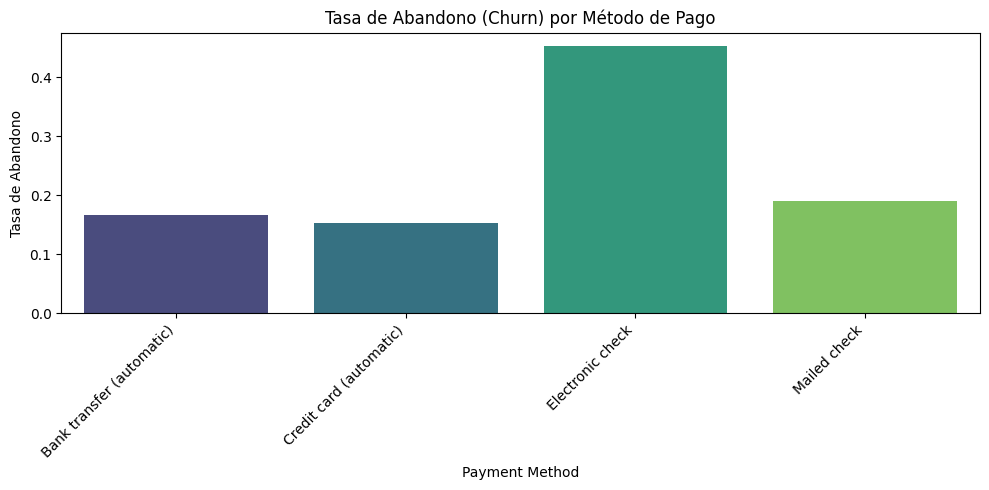

/tmp/ipython-input-720276521.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




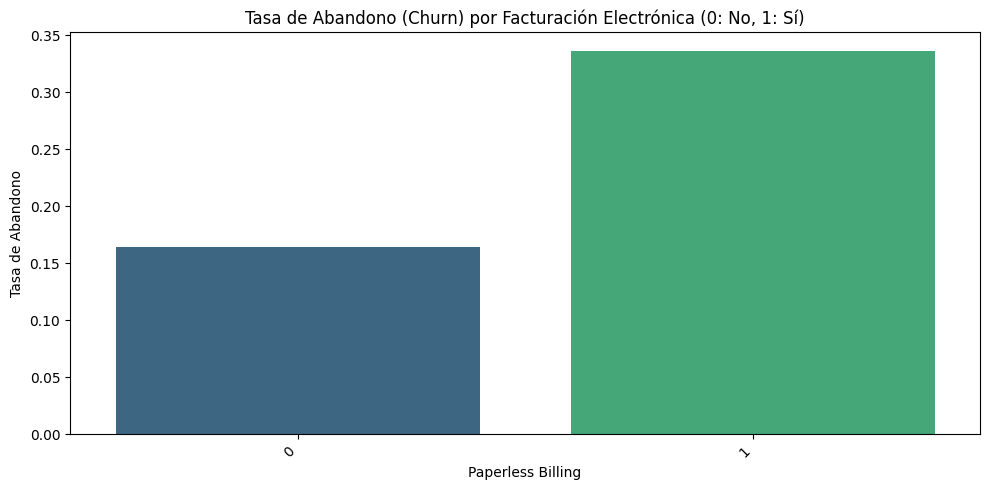

/tmp/ipython-input-720276521.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




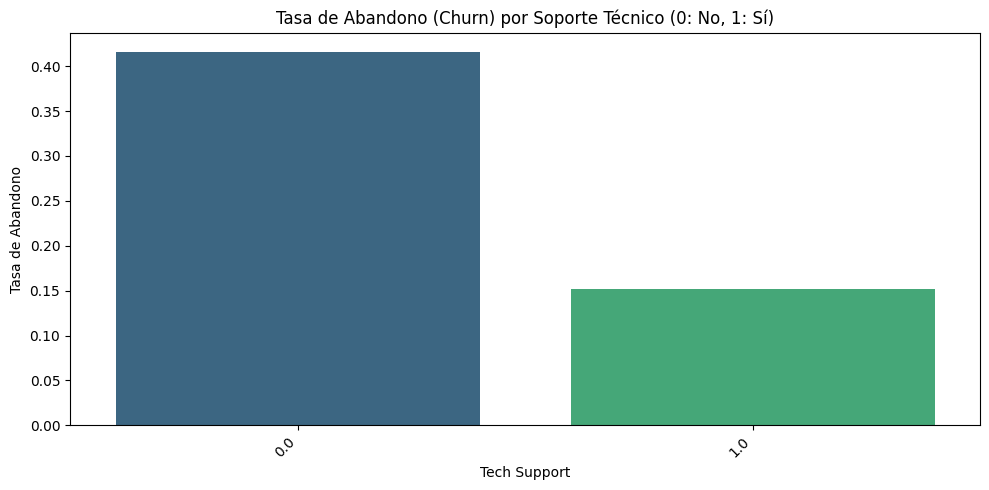

In [111]:
def plot_churn_by_category(dataframe, column_name, title_prefix):
    crosstab_data = pd.crosstab(dataframe[column_name], dataframe['churn'], normalize='index')
    crosstab_data.columns = ['No Churn', 'Churn']
    crosstab_data = crosstab_data.reset_index()

    plt.figure(figsize=(10, 5))
    sns.barplot(x=column_name, y='Churn', data=crosstab_data, palette='viridis')
    plt.title(f'Tasa de Abandono (Churn) por {title_prefix}')
    plt.xlabel(column_name.replace('_', ' ').title())
    plt.ylabel('Tasa de Abandono')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


plot_churn_by_category(df, 'contract', 'Tipo de Contrato')
plot_churn_by_category(df, 'internet_service', 'Servicio de Internet')
plot_churn_by_category(df, 'payment_method', 'Método de Pago')
plot_churn_by_category(df, 'paperless_billing', 'Facturación Electrónica (0: No, 1: Sí)')
plot_churn_by_category(df, 'tech_support', 'Soporte Técnico (0: No, 1: Sí)')

In [112]:
#Para facilitar la interpretación de los gráficos, mapearemos los valores de `churn` a 'Sí' y 'No'.
df_plot = df.copy()
df_plot['churn_label'] = df_plot['churn'].map({0.0: 'No', 1.0: 'Sí'})

### Análisis de `tenure` (meses de contrato) vs. Churn

/tmp/ipython-input-3125774142.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




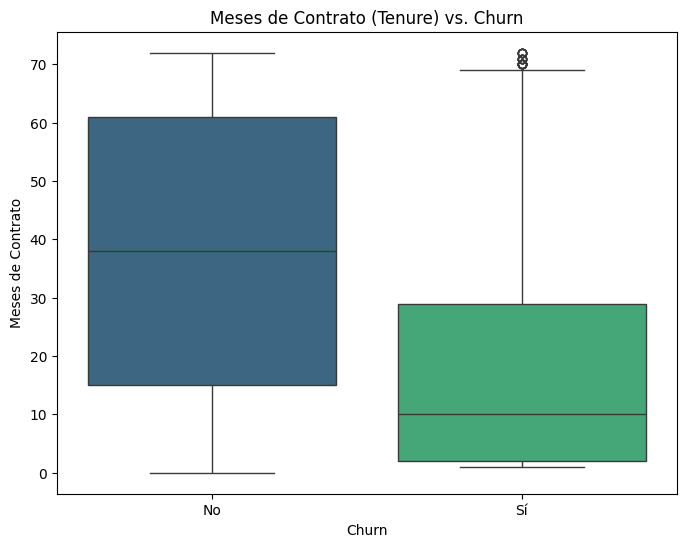

In [113]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn_label', y='tenure', data=df_plot, palette='viridis')
plt.title('Meses de Contrato (Tenure) vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Meses de Contrato');

**Interpretación para `tenure`:**

El Boxplot muestra que la mediana de `tenure` para los clientes que no churnean es significativamente mayor que para aquellos que sí lo hacen. Esto sugiere que **los clientes que churnean tienden a tener un `tenure` (meses de contrato) menor**.

El 50% de los clientes que abandonan lo hace antes de cumplir 10 meses, mientras que el cliente típico de la base general permanece casi 2 años y medio.

In [114]:
# Tomamos ternure en gurpos de 6 meses
# Por ejemplo, tenure 0-5 aparecerá en el grupo 0, 6-11 en el gurpo 6, etc.
df_plot['tenure_group'] = (df_plot['tenure'] // 6) * 6

# Calculamos el churn rate para cada grupo de tenure
churn_by_tenure_group = df_plot.groupby('tenure_group')['churn'].mean().reset_index()

# Convertimos el churn rate a porcentaje para entender mejor
churn_by_tenure_group['churn_rate_percentage'] = churn_by_tenure_group['churn'] * 100

tenure_labels = []
for t_group in churn_by_tenure_group['tenure_group']:
    if t_group == churn_by_tenure_group['tenure_group'].max():
        tenure_labels.append(f'{t_group} + meses')
    else:
        tenure_labels.append(f'{t_group}-{t_group+5} meses')

# Creamos el scatter plot
fig = px.scatter(
    churn_by_tenure_group,
    x='tenure_group',
    y='churn_rate_percentage',
    size='churn_rate_percentage', # Hacemos que los puntos sean más grandes dependiendo del porcentaje
    hover_name='tenure_group',
    hover_data={'churn_rate_percentage': ':.2f%'},
    title='Tasa de Abandono (Churn) por Meses de Antigüedad (Grupos de 6 meses)',
    labels={
        'tenure_group': 'Rango de Meses de Antigüedad',
        'churn_rate_percentage': 'Tasa de Abandono (%)'
    }
)

# Customize x-axis to show ticks at the start of each group with custom labels
fig.update_xaxes(tickvals=churn_by_tenure_group['tenure_group'].unique(), ticktext=tenure_labels)

fig.show()


### Análisis de `monthly_charges` (cargos mensuales) vs. Churn

/tmp/ipython-input-1681722555.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




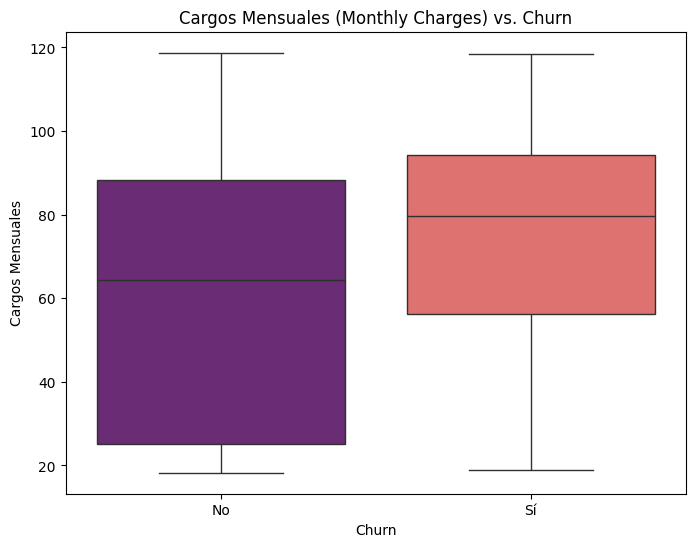

In [115]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn_label', y='monthly_charges', data=df_plot, palette='magma')
plt.title('Cargos Mensuales (Monthly Charges) vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Cargos Mensuales');

**Interpretación para `monthly_charges`:**

Este gráfico indica que la mediana de los cargos mensuales es más alta para los clientes que churnean en comparación con los que no. Por lo tanto, parece que **los clientes que churnean pagan más mensualmente**.

### Análisis de `total_charges` (cargos totales) vs. Churn

/tmp/ipython-input-3812693653.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




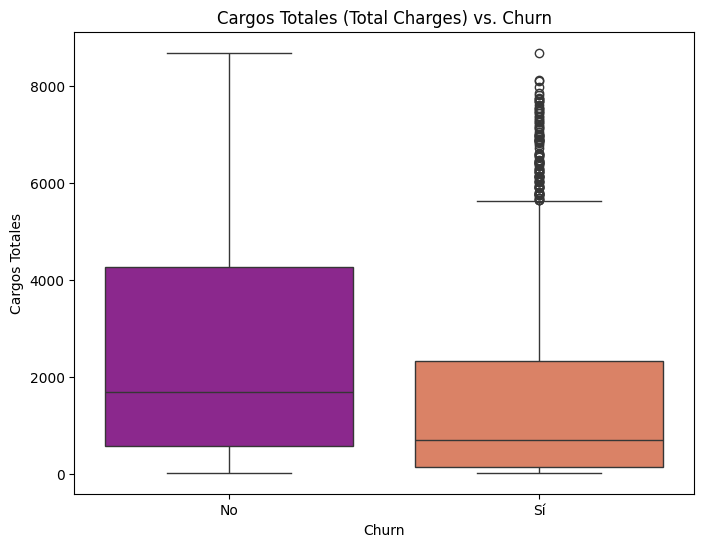

In [116]:
df_plot_total_charges = df_plot.dropna(subset=['total_charges']) # Eliminar NaN para total_charges

plt.figure(figsize=(8, 6))
sns.boxplot(x='churn_label', y='total_charges', data=df_plot_total_charges, palette='plasma')
plt.title('Cargos Totales (Total Charges) vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Cargos Totales');

**Interpretación para `total_charges`:**

El Boxplot para `total_charges` muestra que los clientes que no churnean tienen una mediana de cargos totales significativamente más alta que los clientes que sí lo hacen. Esto sugiere que **los clientes que churnean han gastado menos en total**.

**En resumen, para responder a las siguientes preguntas:**

*   **¿Los que churnean tienen menor `tenure`?** Sí, los clientes que churnean tienden a tener un `tenure` significativamente menor.
*   **¿Pagan más mensual?** Sí, los clientes que churnean suelen tener cargos mensuales más altos.
*   **¿Han gastado menos en total?** Sí, los clientes que churnean han gastado menos en total con la empresa.

## 6. Insights y Conclusiones

🔍 **Insights clave**

- El churn está fuertemente asociado al nivel de compromiso del cliente.

- Los clientes con contratos month-to-month presentan tasas de abandono significativamente más altas.

- Clientes con menor tenure  y menor gasto total histórico son más propensos a churnear.

- Los clientes que churnean presentan cargos mensuales más altos, lo que sugiere sensibilidad al precio.

- Servicios como soporte técnico reducen notablemente la tasa de churn.

- El método de pago electronic check está asociado a mayores tasas de abandono, lo cual puede indicar menor fidelización.

- El 53% de los clientes que churnean lo hace en los primeros 6 meses de servicio.

📌 **Recomendaciones preliminares**

- Incentivar la migración de clientes month-to-month a contratos anuales.

- Diseñar ofertas específicas para clientes nuevos durante los primeros meses.

- Revisar pricing y bundles para clientes con cargos mensuales elevados.

- Promover servicios de valor agregado como soporte técnico.

- Analizar más a fondo el perfil de clientes que utilizan electronic check y paperless billing.

## 7. Modelo Predictivo de Churn (EXTRA)

**Objetivo del modelo**

Responder a esta pregunta de negocio:

- ¿Qué clientes tienen mayor probabilidad de churn y qué variables explican ese riesgo?

No buscamos solo accuracy:

- Buscamos interpretabilidad

- Buscamos insights accionables

### Seleccionamos variables útiles

In [117]:
lista_variables = ['tenure', 'monthly_charges', 'total_charges', 'contract', 'paperless_billing',
                   'tech_support', 'payment_method', 'internet_service']

In [118]:
#Definimos valores X e y

y = df['churn']
X = df[lista_variables]

In [119]:
X.sample(5)

,tenure,monthly_charges,total_charges,contract,paperless_billing,tech_support,payment_method,internet_service
469,48,69.55,3435.6,One year,1,1.0,Mailed check,DSL
858,45,108.45,4964.7,Month-to-month,1,1.0,Credit card (automatic),Fiber optic
5669,28,35.75,961.4,Month-to-month,1,1.0,Mailed check,DSL
6616,5,81.00,389.6,Month-to-month,1,0.0,Credit card (automatic),Fiber optic
461,29,48.95,1323.7,Month-to-month,0,0.0,Bank transfer (automatic),DSL


In [120]:
X['contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

### Transformación de variables categóricas

In [121]:
# Aplicamos OneHotEncoding, eliminando la primera columna de cada variable para evitar multicolinealidad
X_encoded = pd.get_dummies(X, drop_first=True)


In [122]:
# Antes de la división, vamos a eliminar las filas donde 'churn' es NaN
# Esto es importante porque 'train_test_split' con 'stratify=y' no puede manejar NaN en la variable objetivo.

# Creamos una copia del DataFrame para no modificar el original directamente para este paso
df_modelo = df.dropna(subset=['churn']).copy()

# Definimos las variables X e y con el DataFrame filtrado
y = df_modelo['churn']
X = df_modelo[lista_variables]

# Aplicamos OneHotEncoding nuevamente a X si es necesario, ya que df_modelo es nuevo
# Asegurémonos de que X_encoded refleje los datos filtrados
categorical_cols = ['contract', 'payment_method', 'internet_service']

X_encoded_modelo = pd.get_dummies(X[categorical_cols], drop_first=True)

columnas_numericas = ['tenure', 'monthly_charges', 'total_charges', 'paperless_billing', 'tech_support']
# Manejar NaN en columnas numéricas de X antes de concatenar si hay alguna otra columna que no tenga 0s o 1s
# En este caso, 'tech_support' y 'total_charges' tienen NaNs.
# Para la división, podemos dejar los NaNs en X, pero es mejor imputarlos o eliminarlos antes del entrenamiento del modelo.
# Por ahora, simplemente asegurémonos de que las columnas de X estén bien alineadas con y.

X_numerico_binario_modelo = X[columnas_numericas]

X_final = pd.concat([X_numerico_binario_modelo, X_encoded_modelo], axis=1)

# Hacemos la división de train (el modelo aprende)/test(verificamos si generaliza)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

Dimensiones de X_train: (4930, 12)
Dimensiones de X_test: (2113, 12)
Dimensiones de y_train: (4930,)
Dimensiones de y_test: (2113,)


### Verficiación

In [123]:
X_train.shape, X_test.shape

((4930, 12), (2113, 12))

In [124]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

,proportion
churn,
0.0,0.734501
1.0,0.265499


In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Identificar columnas con NaNs en X_final (que se propagan a X_train y X_test)
columnas_nan_train = X_train.columns[X_train.isnull().any()].tolist()
columnas_nan_test = X_test.columns[X_test.isnull().any()].tolist()

# Imputar NaNs en X_train y X_test
# Para 'tech_support', si el NaN significa 'No Internet Service', es razonable imputar con 0
# Para 'total_charges', usaremos la mediana para no ser sensibles a outliers

# Crear un imputador para 'tech_support' con una constante de 0
imputer_tech_support = SimpleImputer(strategy='constant', fill_value=0)
X_train['tech_support'] = imputer_tech_support.fit_transform(X_train[['tech_support']])
X_test['tech_support'] = imputer_tech_support.transform(X_test[['tech_support']])

# Crear un imputador para 'total_charges' con la mediana
imputer_total_charges = SimpleImputer(strategy='median')
X_train['total_charges'] = imputer_total_charges.fit_transform(X_train[['total_charges']])
X_test['total_charges'] = imputer_total_charges.transform(X_test[['total_charges']])

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Modelo de Regresión Logística entrenado con éxito.")


Modelo de Regresión Logística entrenado con éxito.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### Evaluación del modelo

#### Predicciones

In [126]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

#### Reporte de clasificación

In [127]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1552
         1.0       0.63      0.52      0.57       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.72      2113
weighted avg       0.78      0.79      0.78      2113



#### ROC-AUC (métrica de aprendizaje automático)

Regla general:

- 0.5 → sin poder predictivo
- 0.7+ → buen modelo base
- 0.8+ → muy bueno

In [128]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_proba)

np.float64(0.8323151542716432)

#### Matriz de confusión

Esto nos dirá:

- Cuántos churn se detectaron bien
- Cuántos se escaparon

In [129]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[1382,  170],
       [ 270,  291]])

### Interpretación

#### Coeficientes del modelo

In [130]:
import pandas as pd

coef_df = pd.DataFrame({
    'feature': X_encoded.columns,
    'coefficient': model.coef_[0]
}).sort_values(by='coefficient', ascending=False)

coef_df

,feature,coefficient
10,internet_service_Fiber optic,0.710543
3,paperless_billing,0.468991
8,payment_method_Electronic check,0.461154
2,total_charges,0.000358
1,monthly_charges,-0.000321
9,payment_method_Mailed check,-0.022389
7,payment_method_Credit card (automatic),-0.049330
0,tenure,-0.062345
4,tech_support,-0.465365
5,contract_One year,-0.774398


**Variables más influyentes**

Las 3 variables con mayor coeficiente positivo:

- `internet_service_Fiber optic`
- `paperless_billing`
- `payment_method_Electronic check`

Esto encaja perfectamente con el EDA:

- ***Fibra óptica** → planes más caros → mayor expectativa → más churn*
- ***Paperless billing** → clientes digitales → menor fricción para irse*
- ***Electronic check** → menor fidelización*


### 🔍 Interpretación del modelo

El modelo de regresión logística presenta un desempeño sólido (ROC-AUC = 0.83), confirmando los patrones observados durante el análisis exploratorio.

Las variables que incrementan la probabilidad de churn están asociadas a **servicios de mayor costo y menor fidelización**, como el servicio de **fibra óptica, el uso de facturación electrónica y el método de pago electronic check**.

En cuanto al tipo de contrato, el modelo utiliza el contrato mes a mes como categoría de referencia. Los coeficientes negativos para contratos de uno (−0.77) y dos años (-1.37) indican que estos reducen significativamente la probabilidad de abandono, siendo **el contrato bianual el más efectivo como mecanismo de retención**.

##📄Informe final

**Análisis de Evasión de Clientes – Telecom X**

### 1. Objetivo del Proyecto

El objetivo de este proyecto fue analizar la evasión de clientes **(churn)** en **Telecom X** con el fin de *identificar los principales factores asociados a la cancelación del servicio* y evaluar la viabilidad de un enfoque predictivo que permita anticipar el abandono de clientes.

A través de técnicas de análisis exploratorio de datos y modelado predictivo, se buscó generar insights accionables que apoyen la toma de decisiones estratégicas orientadas a la retención de clientes.

### 2. Descripción de los Datos

El análisis se realizó sobre un conjunto de datos de **7,267 clientes**, que incluye información demográfica, características del servicio contratado, facturación, tipo de contrato y estado de churn.

Los datos fueron extraídos desde una **API** en formato *JSON* y procesados mediante un flujo **ETL** *(Extracción, Transformación y Carga)*, asegurando consistencia, limpieza y preparación para el análisis y modelado.

### 3. Principales Resultados del Análisis Exploratorio

El Análisis Exploratorio de Datos (EDA) permitió identificar patrones claros asociados al churn:

- El churn está fuertemente relacionado con el **nivel de compromiso del cliente**.
- Los clientes con **contratos mes a mes** presentan tasas de evasión significativamente mayores en comparación con contratos anuales o bianuales.
- Los clientes que churnean suelen tener **menor antigüedad (tenure) y menor gasto total acumulado**, lo que indica relaciones comerciales más cortas.
- Se observa una asociación entre **cargos mensuales más elevados y una mayor probabilidad de churn**, sugiriendo *sensibilidad al precio*.
- Servicios como **soporte técnico** actúan como factores de retención.
- El método de pago **electronic check** y el uso de **facturación electrónica** se asocian con *mayores tasas de evasión*.

Estos hallazgos sugieren que el churn no es un fenómeno aleatorio, sino que sigue patrones consistentes y observables.

### 5. Conclusiones

El análisis confirma que la evasión de clientes en Telecom X está principalmente impulsada por factores relacionados con:
- Bajo compromiso contractual.
- Sensibilidad al precio.
- Menor duración de la relación con el cliente.

Asimismo, demuestra que es posible identificar de manera anticipada a los clientes con mayor riesgo de abandono mediante modelos predictivos simples e interpretables.

### 6. Recomendaciones Estratégicas

A partir de los resultados obtenidos, se sugieren las siguientes acciones:
- **Incentivar la migración** de clientes con contratos mes a mes hacia planes de mayor duración.
- Implementar **estrategias de retención** temprana enfocadas en clientes nuevos.
- Revisar el **esquema de precios** para clientes con cargos mensuales elevados.
- Promover **servicios de valor agregado**, como soporte técnico.
- Diseñar acciones específicas para clientes que utilizan **electronic check** como método de pago.

### 7. Próximos Pasos

**1.** Integrar el modelo predictivo en procesos de monitoreo continuo de churn.

**2.** Evaluar modelos más avanzados para mejorar la detección de clientes en riesgo.

**3.** Diseñar campañas de retención basadas en segmentación por riesgo.